## Importing the necessary libraries for use in the process.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the csv file then saving it onto a dataframe

In [2]:
df = pd.read_csv('/kaggle/input/smartphones-cleaned/final.csv')
df.head()

,model,rating,os,brand,price_numeric,capacity,battery_watt,charging_type,RAM,ROM,...,Rear_camera,No_of_rear_cameras,display_size,display_frequency,Resolution,card_supported,ppi,screen_area_in2,battery_per_gb_ram,watt_per_mah
0,OnePlus 11 5G,4.45,Android v13,oneplus,54999.0,5000,100,Fast,12,256,...,"[50, 48, 32]",3,6.70,120.0,"[1440, 3216]",0,525.921017,16.743162,416.666667,0.020000
1,Motorola Moto G62 5G,4.05,Android v12,motorola,14999.0,5000,33,Fast,6,128,...,"[50, 8, 2]",3,6.55,120.0,"[1080, 2400]",1,401.802361,16.054990,833.333333,0.006600
2,Realme 10 Pro Plus,4.10,Android v13,realme,24999.0,5000,67,Fast,6,128,...,"[108, 8, 2]",3,6.70,120.0,"[1080, 2412]",0,394.440763,16.743162,833.333333,0.013400
3,Samsung Galaxy F23 5G (6GB RAM + 128GB),4.00,Android v12,samsung,16999.0,5000,25,Fast,6,128,...,"[50, 8, 2]",3,6.60,120.0,"[1080, 2408]",1,399.864072,16.265052,833.333333,0.005000
4,Apple iPhone 14,4.05,iOS v16,apple,65999.0,3279,15,Fast,6,128,...,"[12, 12]",2,6.10,-1.0,"[1170, 2532]",0,457.254346,14.168826,546.500000,0.004575


## EDA
Getting a general understanding of the dataset to check for missing values

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model               1006 non-null   object 
 1   rating              1006 non-null   float64
 2   os                  1006 non-null   object 
 3   brand               1006 non-null   object 
 4   price_numeric       1006 non-null   float64
 5   capacity            1006 non-null   int64  
 6   battery_watt        1006 non-null   int64  
 7   charging_type       1006 non-null   object 
 8   RAM                 1006 non-null   int64  
 9   ROM                 1006 non-null   int64  
 10  Dual_Sim            1006 non-null   int64  
 11  5G                  1006 non-null   int64  
 12  NFC                 1006 non-null   int64  
 13  WiFi                1006 non-null   int64  
 14  IR_Blaster          1006 non-null   int64  
 15  Processor_Name      1006 non-null   object 
 16  Proces

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,rating,price_numeric,capacity,battery_watt,RAM,ROM,Dual_Sim,5G,NFC,WiFi,...,Processor_GHz,num_core,No_of_rear_cameras,display_size,display_frequency,card_supported,ppi,screen_area_in2,battery_per_gb_ram,watt_per_mah
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,...,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,3.378827,31184.151093,4681.102386,44.154076,6.858847,130.413519,0.980119,0.535785,0.382704,0.978131,...,2.637465,7.500994,2.176938,6.393022,67.200795,0.809145,371.226626,15.753059,inf,0.011787
std,1.399411,39136.972999,1207.573900,39.077995,16.208896,88.399523,0.139660,0.498966,0.486289,0.146328,...,15.731158,1.679107,0.934951,0.859076,56.947942,0.393170,82.002745,3.271568,NaN,0.031907
min,-0.050000,99.000000,54.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,0.000000,0.490000,-1.000000,0.000000,102.449988,0.096040,9.179688,0.001500
25%,3.450000,12414.750000,4500.000000,20.000000,4.000000,64.000000,1.000000,0.000000,0.000000,1.000000,...,2.000000,8.000000,1.000000,6.440000,-1.000000,1.000000,277.200364,15.584780,562.500000,0.004967
50%,3.900000,19499.000000,5000.000000,33.000000,6.000000,128.000000,1.000000,1.000000,0.000000,1.000000,...,2.300000,8.000000,3.000000,6.560000,90.000000,1.000000,395.380386,16.126414,751.666667,0.006600
75%,4.150000,34990.000000,5000.000000,65.000000,8.000000,128.000000,1.000000,1.000000,1.000000,1.000000,...,2.840000,8.000000,3.000000,6.670000,120.000000,1.000000,407.065694,16.648653,1250.000000,0.013400
max,4.450000,650000.000000,22000.000000,682.000000,512.000000,512.000000,1.000000,1.000000,1.000000,1.000000,...,500.000000,8.000000,3.000000,8.030000,240.000000,1.000000,642.633929,32.010206,inf,0.611111


Changing negative values to nan then handling the missing values

In [4]:
df['rating'] = df['rating'].replace(-0.05, np.nan)

df['Processor_GHz'] = df['Processor_GHz'].replace(-1, np.nan)

df['num_core'] = df['num_core'].replace(-1, np.nan)

df['display_frequency'] = df['display_frequency'].replace(-1, np.nan)

#df['Processor_GHz'].fillna(df['Processor_GHz'].mean(), inplace = True)

CHecking the quantity of missing values after replacing the negative values with nan

In [5]:
missing = df.isnull().sum().sort_values(ascending = False)
print(missing[missing > 0])

display_frequency    397
rating               136
Processor_GHz         83
num_core              25
dtype: int64


Handling the missing values.
* for missing categorical, replace with new catgegory.
* for missing numerical, replace with mean
* for missing values less than 5% drop

In [6]:
df['rating'].fillna(0, inplace = True)
df['display_frequency'].fillna(df['display_frequency'].mean())
df.dropna(subset = ['Processor_GHz', 'num_core'], inplace = True)

/tmp/ipykernel_13/335441165.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(0, inplace = True)


There are values with infinite in the battery per gb ram so i need to find entries of ram that are 0. row dropped as there was only one row.

In [7]:
zero_ram = df[df['RAM'] == 0]
zero_ram.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 605 to 605
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model               1 non-null      object 
 1   rating              1 non-null      float64
 2   os                  1 non-null      object 
 3   brand               1 non-null      object 
 4   price_numeric       1 non-null      float64
 5   capacity            1 non-null      int64  
 6   battery_watt        1 non-null      int64  
 7   charging_type       1 non-null      object 
 8   RAM                 1 non-null      int64  
 9   ROM                 1 non-null      int64  
 10  Dual_Sim            1 non-null      int64  
 11  5G                  1 non-null      int64  
 12  NFC                 1 non-null      int64  
 13  WiFi                1 non-null      int64  
 14  IR_Blaster          1 non-null      int64  
 15  Processor_Name      1 non-null      object 
 16  Processor_GHz

In [8]:
df = df[df['RAM'] != 0]
df.reset_index(drop = True, inplace = True)

## Univarite Analysis

<Axes: >

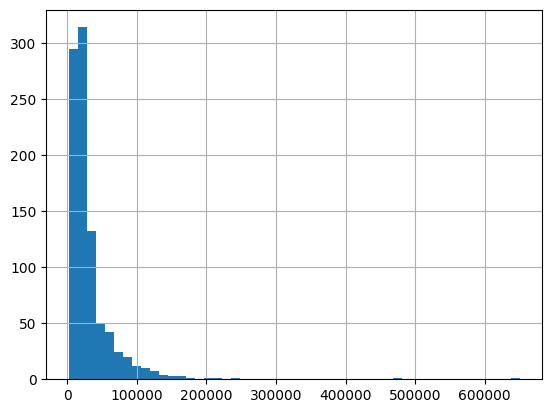

In [9]:
df['price_numeric'].hist(bins = 50)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_numeric', ylabel='Count'>

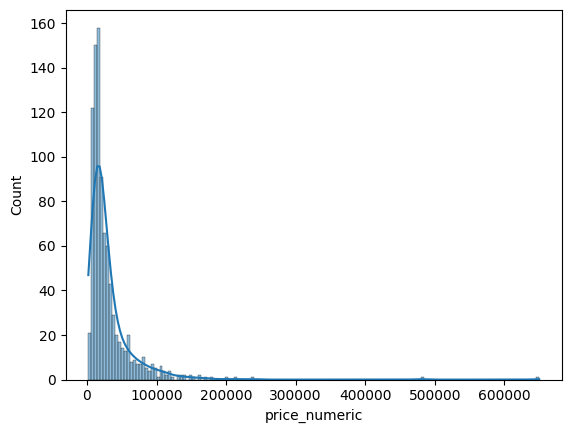

In [10]:
sns.histplot(df['price_numeric'], kde=True)

<Axes: xlabel='price_numeric'>

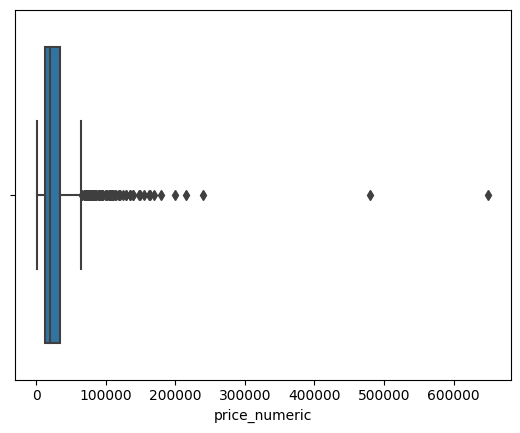

In [11]:
sns.boxplot(x=df['price_numeric'])

Data Transformation as the price is right skewed/positively skewed. Log transformation is the most popular transformation

In [12]:
df['log_price'] = np.log1p(df['price_numeric'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='log_price', ylabel='Count'>

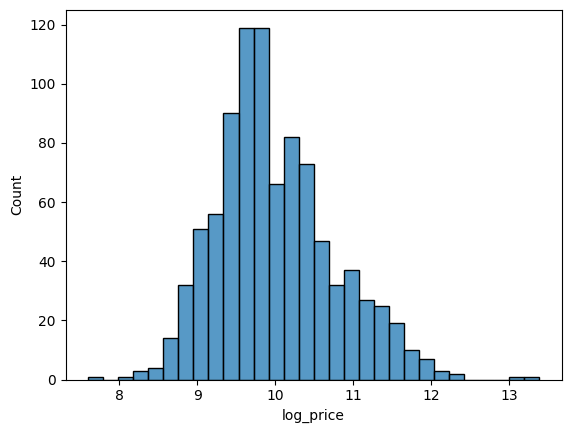

In [13]:
sns.histplot(df['log_price'])

<Axes: xlabel='log_price'>

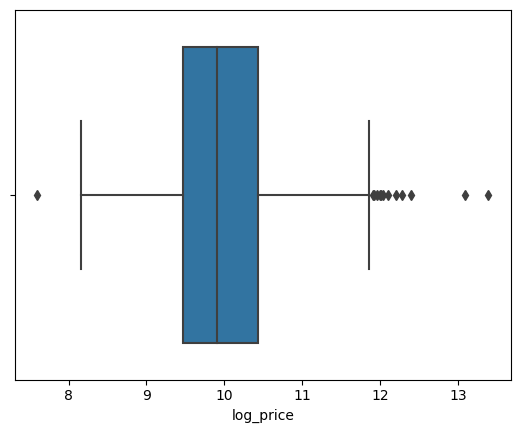

In [14]:
sns.boxplot(x = df['log_price'])

In [15]:
df_numeric = df.select_dtypes(include = ['int64', 'float64'])

## Bivariate Analysis

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


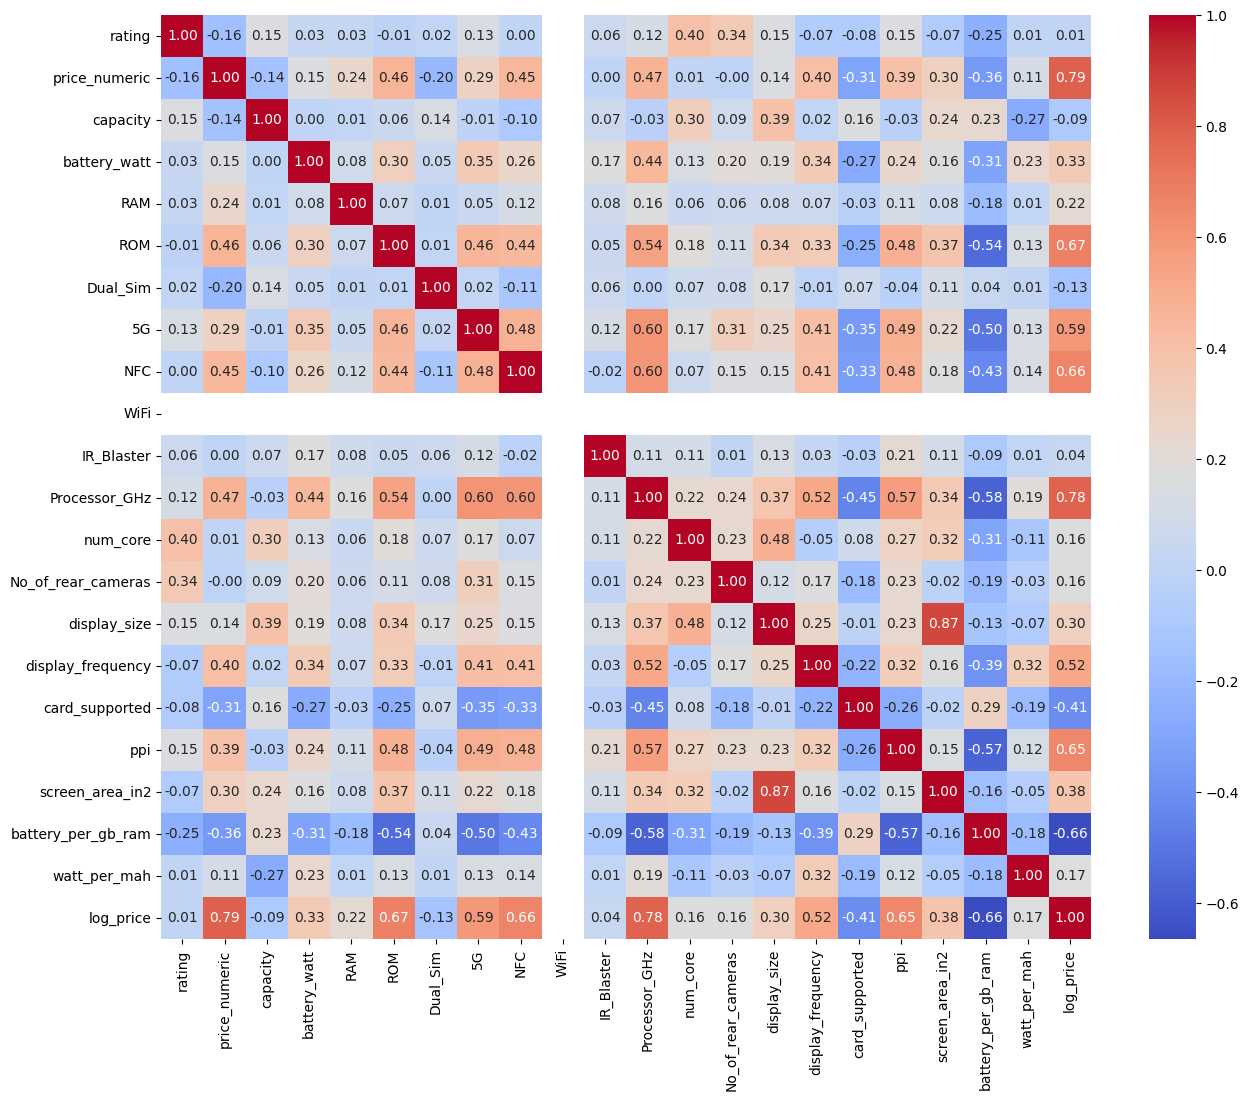

In [16]:
correlations = df_numeric.corr()

plt.figure(figsize = (15, 12))
sns.heatmap(
    correlations,
    annot = True,
    fmt = '.2f',
    cmap = 'coolwarm',
    cbar = True
)
plt.show()

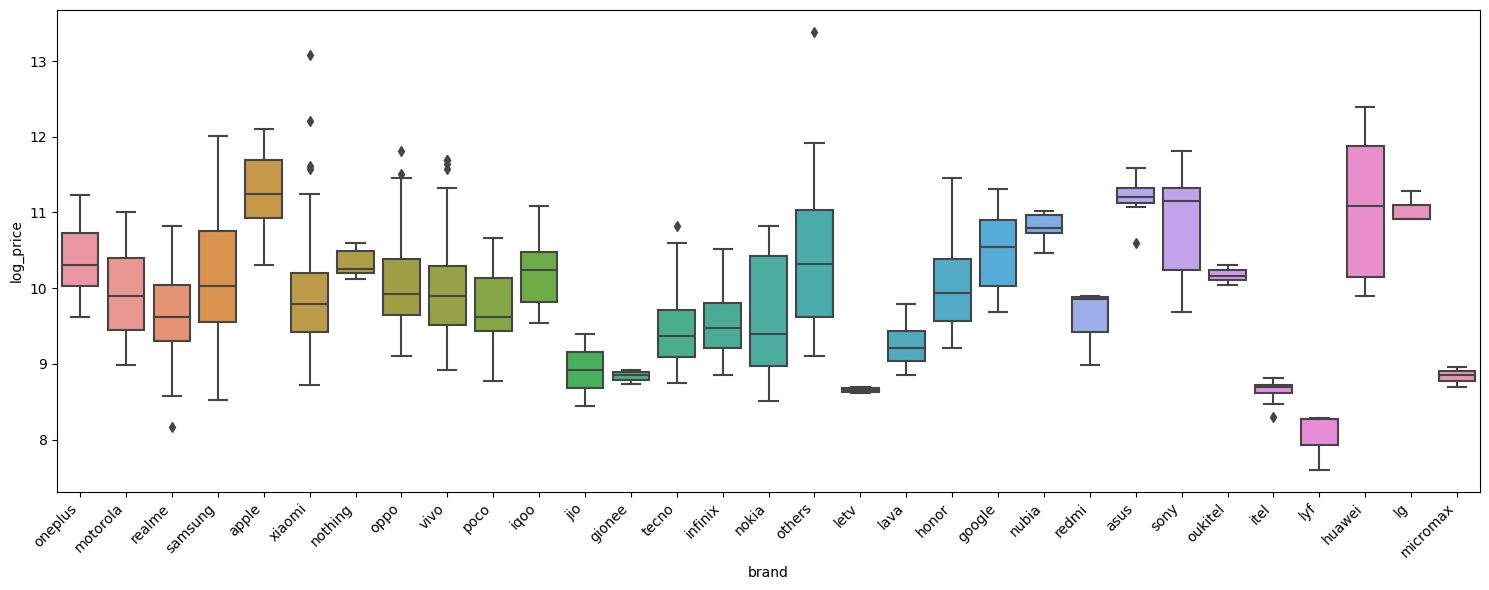

In [17]:
plt.figure(figsize=(15, 6))
sns.boxplot(x = 'brand', y = 'log_price', data = df)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

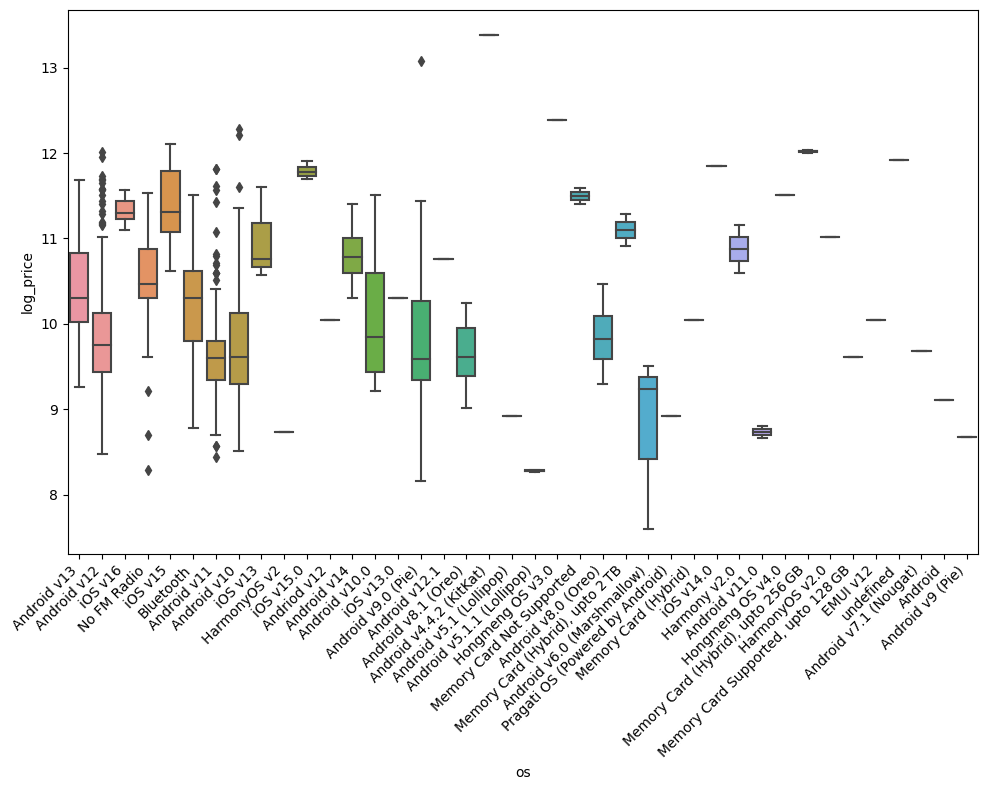

In [18]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'os', y='log_price', data = df)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Feature Engineering

In [19]:
df_encoded = pd.get_dummies(df, columns = ['brand', 'os'], drop_first = True)
df_encoded.head()


,model,rating,price_numeric,capacity,battery_watt,charging_type,RAM,ROM,Dual_Sim,5G,...,"os_Memory Card Supported, upto 128 GB",os_No FM Radio,os_Pragati OS (Powered by Android),os_iOS v13,os_iOS v13.0,os_iOS v14.0,os_iOS v15,os_iOS v15.0,os_iOS v16,os_undefined
0,OnePlus 11 5G,4.45,54999.0,5000,100,Fast,12,256,1,1,...,False,False,False,False,False,False,False,False,False,False
1,Motorola Moto G62 5G,4.05,14999.0,5000,33,Fast,6,128,1,1,...,False,False,False,False,False,False,False,False,False,False
2,Realme 10 Pro Plus,4.10,24999.0,5000,67,Fast,6,128,1,1,...,False,False,False,False,False,False,False,False,False,False
3,Samsung Galaxy F23 5G (6GB RAM + 128GB),4.00,16999.0,5000,25,Fast,6,128,1,1,...,False,False,False,False,False,False,False,False,False,False
4,Apple iPhone 14,4.05,65999.0,3279,15,Fast,6,128,1,1,...,False,False,False,False,False,False,False,False,True,False


## Feature Selection

In [20]:
y = df_encoded['log_price']
X = df_encoded.drop(columns = ['price_numeric', 'log_price', 'model'])